In [1]:
import pylab as pl
import datetime
import pandas as pd
import itertools
from itertools import cycle
import pickle
import random as rn
import os
from time import time
from tqdm import tqdm 
import umap


import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib as mpl

mpl.rcParams['path.simplify'] = True

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils import resample
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

from joblib import Parallel, delayed


In [2]:
os.environ['PYTHONHASHSEED'] = '0'

## The below is necessary for starting Numpy generated random numbers in a well-defined initial state.
np.random.seed(42)

## The below is necessary for starting core Python generated random numbers in a well-defined state.
rn.seed(12345)


In [3]:
df = pd.read_csv("../../Data/mosquitoes_country_LM_5_0.dat", '\t')
RearCnd_counts = df.groupby('RearCnd').size()

df['AgeGroup'] = 0
df['AgeGroup'] = np.where(df['Age']>10, 2, np.where(df['Age']>4, 1, 0))

X = df.iloc[:,6:-1]
y_age = df["Age"]
y_age_groups = df["AgeGroup"]
y_species = df["Species"]
y_status = df["Status"]
y_country = df["Country"]
y_rearcnd = df["RearCnd"]
X = np.asarray(X)
y_age = np.asarray(y_age)
y_age_groups = np.asarray(y_age_groups)
y_species = np.asarray(y_species)
y_status = np.asarray(y_status)
y_country = np.asarray(y_country)
y_rearcnd = np.asarray(y_rearcnd)

print(f'Original lab/field data shapes:')
print('shape of X : {}'.format(X.shape))
print('shape of y age : {}'.format(y_age.shape))
print('shape of y age groups : {}'.format(y_age_groups.shape))
print('shape of y species : {}'.format(y_species.shape))
print('shape of y status : {}'.format(y_status.shape))

Original lab/field data shapes:
shape of X : (40741, 1625)
shape of y age : (40741,)
shape of y age groups : (40741,)
shape of y species : (40741,)
shape of y status : (40741,)


In [4]:

df = pd.read_csv("/home/josh/Documents/Mosquito_Project/Data/Wild_Data/mosquitoes_wild_w_dates_v2.dat", '\t')
df.head(10)
RearCnd_counts = df.groupby('RearCnd').size()

df['AgeGroup'] = 0
df['AgeGroup'] = np.where(df['Age']>10, 2, np.where(df['Age']>4, 1, 0))

X_w = df.iloc[:,8:-1]
y_age_w = df["Age"]
y_age_groups_w = df["AgeGroup"]
y_species_w = df["Species"]
y_status_w = df["Status"]
y_country_w = df["Country"]
y_rearcnd_w = df["RearCnd"]
X_w = np.asarray(X_w)
y_age_w = np.asarray(y_age_w)
y_age_groups_w = np.asarray(y_age_groups_w)
y_species_w = np.asarray(y_species_w)
y_status_w = np.asarray(y_status_w)
y_country_w = np.asarray(y_country_w)
y_rearcnd_w = np.asarray(y_rearcnd_w)

print(f'Wild lab/field data shapes:')
print('shape of X : {}'.format(X_w.shape))
print('shape of y age : {}'.format(y_age_w.shape))
print('shape of y age groups : {}'.format(y_age_groups_w.shape))
print('shape of y species : {}'.format(y_species_w.shape))
print('shape of y status : {}'.format(y_status_w.shape))


Wild lab/field data shapes:
shape of X : (2788, 1625)
shape of y age : (2788,)
shape of y age groups : (2788,)
shape of y species : (2788,)
shape of y status : (2788,)


In [5]:
X = np.concatenate((X,X_w))
y_age = np.concatenate((y_age,y_age_w))
y_age_groups = np.concatenate((y_age_groups,y_age_groups_w))
y_species = np.concatenate((y_species,y_species_w))
y_status = np.concatenate((y_status,y_status_w))
y_country = np.concatenate((y_country,y_country_w))
y_rearcnd = np.concatenate((y_rearcnd,y_rearcnd_w))

print('shape of X : {}'.format(X.shape))
print('shape of y age : {}'.format(y_age.shape))
print('shape of y age groups : {}'.format(y_age_groups.shape))
print('shape of y species : {}'.format(y_species.shape))
print('shape of y status : {}'.format(y_status.shape))

shape of X : (43529, 1625)
shape of y age : (43529,)
shape of y age groups : (43529,)
shape of y species : (43529,)
shape of y status : (43529,)


In [6]:
reducer = umap.UMAP(metric='manhattan', n_neighbors=200, min_dist=0.1)

embedding = reducer.fit_transform(X)
print(embedding.shape)

(43529, 2)


['BF' 'GR' 'NP' 'P1' 'P2' 'P3' 'SF' 'UN' 'WG']
AA


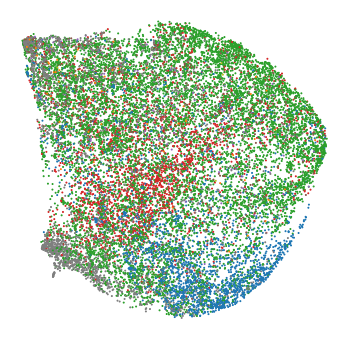

AC


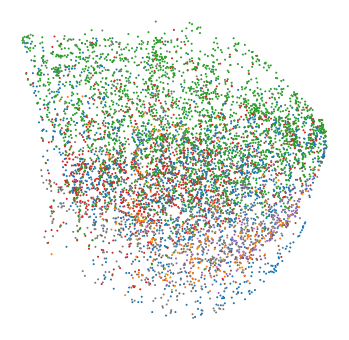

AG


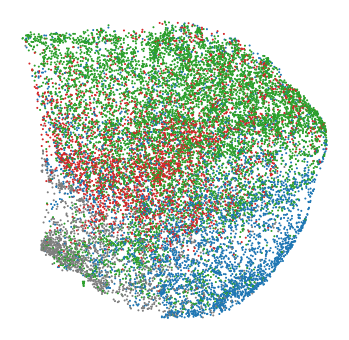

In [7]:
print(np.unique(y_status))

print('AA')
embedding_temp = embedding[y_species=='AA']
y_status_temp = y_status[y_species=='AA']
y_status_col = np.copy(y_status_temp)
y_status_col[y_status_col=='BF'] = 0
y_status_col[y_status_col=='GR'] = 1
y_status_col[y_status_col=='SF'] = 2
y_status_col[y_status_col=='UN'] = 3
y_status_col[y_status_col=='WG'] = 4
y_status_col[y_status_col=='NP'] = 5
y_status_col[y_status_col=='P1'] = 6
y_status_col[y_status_col=='P2'] = 7
y_status_col[y_status_col=='P3'] = 8
cols = []
for num in y_status_col:
    if num==0:
        cols.append('tab:blue')
    elif num==1:
        cols.append('tab:red')
    elif num==2:
        cols.append('tab:green')
    elif num==3:
        cols.append('tab:grey')
    elif num==4:
        cols.append('tab:orange')
    elif num==5:
        cols.append('tab:purple')
    elif num==6:
        cols.append('tab:brown')
    elif num==7:
        cols.append('tab:olive')
    elif num==8:
        cols.append('tab:pink')
fig = plt.figure(figsize=(6,6))
plt.scatter(
    embedding_temp[:, 0],
    embedding_temp[:, 1],
    c=[x for x in cols],
    s=1)
plt.set_cmap('tab10')
plt.axis('off')
# fig.savefig('plots/status_AA.pdf',dpi=300)
plt.show()

print('AC')
embedding_temp = embedding[y_species=='AC']
y_status_temp = y_status[y_species=='AC']
y_status_col = np.copy(y_status_temp)
y_status_col[y_status_col=='BF'] = 0
y_status_col[y_status_col=='GR'] = 1
y_status_col[y_status_col=='SF'] = 2
y_status_col[y_status_col=='UN'] = 3
y_status_col[y_status_col=='WG'] = 4
y_status_col[y_status_col=='NP'] = 5
y_status_col[y_status_col=='P1'] = 6
y_status_col[y_status_col=='P2'] = 7
y_status_col[y_status_col=='P3'] = 8
cols = []
for num in y_status_col:
    if num==0:
        cols.append('tab:blue')
    elif num==1:
        cols.append('tab:red')
    elif num==2:
        cols.append('tab:green')
    elif num==3:
        cols.append('tab:grey')
    elif num==4:
        cols.append('tab:orange')
    elif num==5:
        cols.append('tab:purple')
    elif num==6:
        cols.append('tab:brown')
    elif num==7:
        cols.append('tab:olive')
    elif num==8:
        cols.append('tab:pink')
fig = plt.figure(figsize=(6,6))
plt.scatter(
    embedding_temp[:, 0],
    embedding_temp[:, 1],
    c=[x for x in cols],
    s=1)
plt.set_cmap('tab10')
plt.axis('off')
# fig.savefig('plots/status_AC.pdf',dpi=300)
plt.show()

print('AG')
embedding_temp = embedding[y_species=='AG']
y_status_temp = y_status[y_species=='AG']
y_status_col = np.copy(y_status_temp)
y_status_col[y_status_col=='BF'] = 0
y_status_col[y_status_col=='GR'] = 1
y_status_col[y_status_col=='SF'] = 2
y_status_col[y_status_col=='UN'] = 3
y_status_col[y_status_col=='WG'] = 4
y_status_col[y_status_col=='NP'] = 5
y_status_col[y_status_col=='P1'] = 6
y_status_col[y_status_col=='P2'] = 7
y_status_col[y_status_col=='P3'] = 8
cols = []
for num in y_status_col:
    if num==0:
        cols.append('tab:blue')
    elif num==1:
        cols.append('tab:red')
    elif num==2:
        cols.append('tab:green')
    elif num==3:
        cols.append('tab:grey')
    elif num==4:
        cols.append('tab:orange')
    elif num==5:
        cols.append('tab:purple')
    elif num==6:
        cols.append('tab:brown')
    elif num==7:
        cols.append('tab:olive')
    elif num==8:
        cols.append('tab:pink')
fig = plt.figure(figsize=(6,6))
plt.scatter(
    embedding_temp[:, 0],
    embedding_temp[:, 1],
    c=[x for x in cols],
    s=1)
plt.set_cmap('tab10')
plt.axis('off')
# fig.savefig('plots/status_AG.pdf',dpi=300)
plt.show()


['BF' 'GR' 'NP' 'P1' 'P2' 'P3' 'SF' 'UN' 'WG']
AA
['S' 'T']


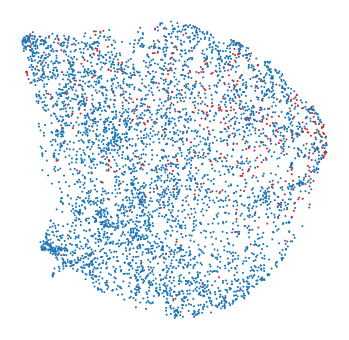

AC
['B' 'S' 'VB']


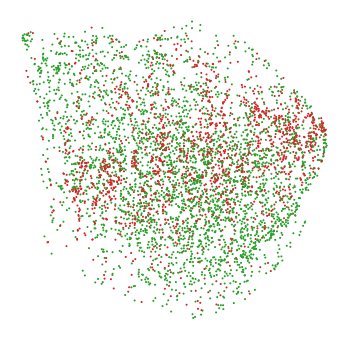

AG
['B' 'S' 'T']


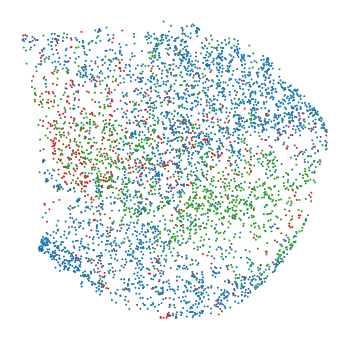

In [10]:
print(np.unique(y_status))

print('AA')
embedding_temp = embedding[y_species=='AA']
y_country_temp = y_country[y_species=='AA']
y_country_col = np.copy(y_country_temp)
print(np.unique(y_country_col))
y_country_col[y_country_col=='T'] = 0
y_country_col[y_country_col=='S'] = 1
y_country_col[y_country_col=='B'] = 2
y_country_col[y_country_col=='VB'] = 3
cols = []
for num in y_country_col:
    if num==0:
        cols.append('tab:blue')
    elif num==1:
        cols.append('tab:red')
    elif num==2:
        cols.append('tab:green')
    elif num==3:
        cols.append('tab:grey')
cols = np.array(cols)
fig = plt.figure(figsize=(6,6))
pltidx = np.arange(len(embedding_temp))
np.random.shuffle(pltidx)
pltidx = pltidx[:5000]
plt.scatter(
    embedding_temp[pltidx, 0],
    embedding_temp[pltidx, 1],
    c=[x for x in cols[pltidx]],
    s=1)
plt.set_cmap('tab10')
plt.axis('off')
fig.savefig('plots/country_AA.pdf',dpi=300)
plt.show()

print('AC')
embedding_temp = embedding[y_species=='AC']
y_country_temp = y_country[y_species=='AC']
y_country_col = np.copy(y_country_temp)
print(np.unique(y_country_col))
y_country_col[y_country_col=='T'] = 0
y_country_col[y_country_col=='S'] = 1
y_country_col[y_country_col=='B'] = 2
y_country_col[y_country_col=='VB'] = 3
cols = []
for num in y_country_col:
    if num==0:
        cols.append('tab:blue')
    elif num==1:
        cols.append('tab:red')
    elif num==2:
        cols.append('tab:green')
    elif num==3:
        cols.append('tab:grey')
cols = np.array(cols)
fig = plt.figure(figsize=(6,6))
pltidx = np.arange(len(embedding_temp))
np.random.shuffle(pltidx)
pltidx = pltidx[:5000]
plt.scatter(
    embedding_temp[pltidx, 0],
    embedding_temp[pltidx, 1],
    c=cols[pltidx],
    s=1
)
plt.set_cmap('tab10')
plt.axis('off')
fig.savefig('plots/country_AC.pdf',dpi=300)
plt.show()

print('AG')
embedding_temp = embedding[y_species=='AG']
y_country_temp = y_country[y_species=='AG']
y_country_col = np.copy(y_country_temp)
print(np.unique(y_country_col))
y_country_col[y_country_col=='T'] = 0
y_country_col[y_country_col=='S'] = 1
y_country_col[y_country_col=='B'] = 2
y_country_col[y_country_col=='VB'] = 3
cols = []
for num in y_country_col:
    if num==0:
        cols.append('tab:blue')
    elif num==1:
        cols.append('tab:red')
    elif num==2:
        cols.append('tab:green')
    elif num==3:
        cols.append('tab:grey')
cols = np.array(cols)
fig = plt.figure(figsize=(6,6))
pltidx = np.arange(len(embedding_temp))
np.random.shuffle(pltidx)
pltidx = pltidx[:5000]
plt.scatter(
    embedding_temp[pltidx, 0],
    embedding_temp[pltidx, 1],
    c=[x for x in cols[pltidx]],
    s=1
)
# plt.set_cmap('tab10')
plt.axis('off')
fig.savefig('plots/country_AG.pdf',dpi=300)
plt.show()


['TF' 'TL' 'VF' 'WV']
AA
['TF' 'TL' 'VF' 'WV']


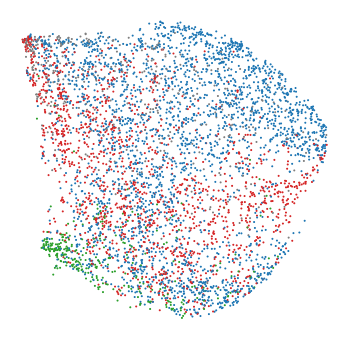

AC
['TF' 'TL' 'VF' 'WV']


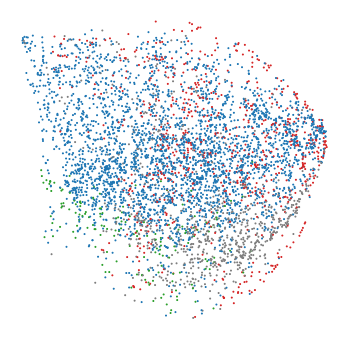

AG
['TF' 'TL' 'VF']


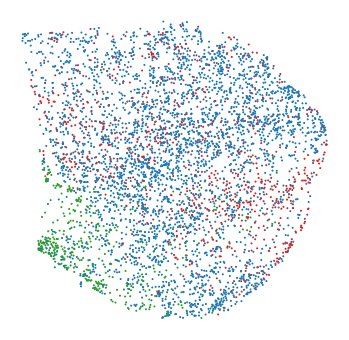

In [11]:
print(np.unique(y_rearcnd))

print('AA')
embedding_temp = embedding[y_species=='AA']
y_rearcnd_temp = y_rearcnd[y_species=='AA']
y_rearcnd_col = np.copy(y_rearcnd_temp)
print(np.unique(y_rearcnd_col))
y_rearcnd_col[y_rearcnd_col=='TL'] = 0
y_rearcnd_col[y_rearcnd_col=='TF'] = 1
y_rearcnd_col[y_rearcnd_col=='VF'] = 2
y_rearcnd_col[y_rearcnd_col=='WV'] = 3
cols = []
for num in y_rearcnd_col:
    if num==0:
        cols.append('tab:blue')
    elif num==1:
        cols.append('tab:red')
    elif num==2:
        cols.append('tab:green')
    elif num==3:
        cols.append('tab:grey')
    elif num==4:
        cols.append('tab:brown')
cols = np.array(cols)
fig = plt.figure(figsize=(6,6))
pltidx = np.arange(len(embedding_temp))
np.random.shuffle(pltidx)
pltidx = pltidx[:5000]
plt.scatter(
    embedding_temp[pltidx, 0],
    embedding_temp[pltidx, 1],
    c=[x for x in cols[pltidx]],
    s=1
)
# plt.set_cmap('tab10')
plt.axis('off')
fig.savefig('plots/rearcnd_AA.pdf',dpi=300)
plt.show()

print('AC')
embedding_temp = embedding[y_species=='AC']
y_rearcnd_temp = y_rearcnd[y_species=='AC']
y_rearcnd_col = np.copy(y_rearcnd_temp)
print(np.unique(y_rearcnd_col))
y_rearcnd_col[y_rearcnd_col=='TL'] = 0
y_rearcnd_col[y_rearcnd_col=='TF'] = 1
y_rearcnd_col[y_rearcnd_col=='VF'] = 2
y_rearcnd_col[y_rearcnd_col=='WV'] = 3
cols = []
for num in y_rearcnd_col:
    if num==0:
        cols.append('tab:blue')
    elif num==1:
        cols.append('tab:red')
    elif num==2:
        cols.append('tab:green')
    elif num==3:
        cols.append('tab:grey')
    elif num==4:
        cols.append('tab:brown')
cols = np.array(cols)
fig = plt.figure(figsize=(6,6))
pltidx = np.arange(len(embedding_temp))
np.random.shuffle(pltidx)
pltidx = pltidx[:5000]
plt.scatter(
    embedding_temp[pltidx, 0],
    embedding_temp[pltidx, 1],
    c=cols[pltidx],
    s=1
)
# plt.set_cmap('tab10')
plt.axis('off')
fig.savefig('plots/rearcnd_AC.pdf',dpi=300)
plt.show()

print('AG')
embedding_temp = embedding[y_species=='AG']
y_rearcnd_temp = y_rearcnd[y_species=='AG']
y_rearcnd_col = np.copy(y_rearcnd_temp)
print(np.unique(y_rearcnd_col))
y_rearcnd_col[y_rearcnd_col=='TL'] = 0
y_rearcnd_col[y_rearcnd_col=='TF'] = 1
y_rearcnd_col[y_rearcnd_col=='VF'] = 2
y_rearcnd_col[y_rearcnd_col=='WV'] = 3
cols = []
for num in y_rearcnd_col:
    if num==0:
        cols.append('tab:blue')
    elif num==1:
        cols.append('tab:red')
    elif num==2:
        cols.append('tab:green')
    elif num==3:
        cols.append('tab:grey')
    elif num==4:
        cols.append('tab:brown')
cols = np.array(cols)
fig = plt.figure(figsize=(6,6))
pltidx = np.arange(len(embedding_temp))
np.random.shuffle(pltidx)
pltidx = pltidx[:5000]
plt.scatter(
    embedding_temp[pltidx, 0],
    embedding_temp[pltidx, 1],
    c=[x for x in cols[pltidx]],
    s=1
)
# plt.set_cmap('tab10')
plt.axis('off')
fig.savefig('plots/rearcnd_AG.pdf',dpi=300)
plt.show()
